In [1]:
import datetime as dt
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix

## Data wrangling

In [2]:
df_users = pd.read_csv('takehome_users.csv', encoding='latin-1')
df_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [3]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


### Creation time

In [4]:
df_users['creation_time'].head()

0    2014-04-22 03:53:30
1    2013-11-15 03:45:04
2    2013-03-19 23:14:52
3    2013-05-21 08:09:28
4    2013-01-17 10:14:20
Name: creation_time, dtype: object

In [5]:
df_users['creation_time'] = pd.to_datetime(df_users['creation_time'], format='%Y-%m-%d %H:%M:%S')
df_users['creation_time'].head()

0   2014-04-22 03:53:30
1   2013-11-15 03:45:04
2   2013-03-19 23:14:52
3   2013-05-21 08:09:28
4   2013-01-17 10:14:20
Name: creation_time, dtype: datetime64[ns]

### Invited by user id

In [6]:
df_users['invited_by_user_id'].unique()

array([10803.,   316.,  1525., ...,  5093., 11854.,  5450.])

In [7]:
df_users['invited_by_user_id'].sort_values()

1663     3.0
3797     7.0
10344    7.0
11460    7.0
7897     7.0
        ... 
11992    NaN
11994    NaN
11996    NaN
11998    NaN
11999    NaN
Name: invited_by_user_id, Length: 12000, dtype: float64

It seems that the missing values means the user is not invited by another user. We will fill those values as 0.

In [8]:
 df_users['invited_by_user_id'] = df_users['invited_by_user_id'].fillna(0)
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   float64       
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          12000 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 937.6+ KB


### Last session creation time

In [9]:
df_users['last_session_creation_time'].unique()

array([1.39813881e+09, 1.39623750e+09, 1.36373489e+09, ...,
       1.39860272e+09, 1.33863816e+09, 1.39072663e+09])

In [10]:
df_users.rename(columns={'object_id': 'user_id', 'last_session_creation_time': 'last_login'}, inplace=True)

In [11]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   user_id                     12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_login                  8823 non-null   float64       
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          12000 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 937.6+ KB


In [12]:
df_users['last_login'] = pd.to_datetime(df_users['last_login'], unit='s')
df_users['last_login']

0       2014-04-22 03:53:30
1       2014-03-31 03:45:04
2       2013-03-19 23:14:52
3       2013-05-22 08:09:28
4       2013-01-22 10:14:20
                ...        
11995   2013-09-06 06:14:15
11996   2013-01-15 18:28:37
11997   2014-04-27 12:45:16
11998   2012-06-02 11:55:59
11999   2014-01-26 08:57:12
Name: last_login, Length: 12000, dtype: datetime64[ns]

The missing values in the last login column most likely means that the users have not logged in with their accounts. We will replace it with their account creation time.

In [13]:
df_users['last_login'].fillna(df_users['creation_time'], inplace=True)
df_users['last_login'].head()

0   2014-04-22 03:53:30
1   2014-03-31 03:45:04
2   2013-03-19 23:14:52
3   2013-05-22 08:09:28
4   2013-01-22 10:14:20
Name: last_login, dtype: datetime64[ns]

In [14]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   user_id                     12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_login                  12000 non-null  datetime64[ns]
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          12000 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(4), object(3)
memory usage: 937.6+ KB


## Adopted user
User logging into the product on 3 separate days in any 7-day period

In [15]:
df_engage = pd.read_csv('takehome_user_engagement.csv')
df_engage.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [16]:
df_engage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [17]:
df_engage['time_stamp'] = pd.to_datetime(df_engage['time_stamp'], format='%Y-%m-%d %H:%M:%S')
df_engage['time_stamp'].head()

0   2014-04-22 03:53:30
1   2013-11-15 03:45:04
2   2013-11-29 03:45:04
3   2013-12-09 03:45:04
4   2013-12-25 03:45:04
Name: time_stamp, dtype: datetime64[ns]

In [18]:
num_user = len(df_users['user_id'])
num_user

12000

In [19]:
df_engage['day_passed'] = df_engage.groupby('user_id')['time_stamp'].diff(2)
df_engage.dropna(subset=['day_passed'], inplace=True)
df_engage.head(20)

,time_stamp,user_id,visited,day_passed
3,2013-12-09 03:45:04,2,1,24 days
4,2013-12-25 03:45:04,2,1,26 days
5,2013-12-31 03:45:04,2,1,22 days
6,2014-01-08 03:45:04,2,1,14 days
7,2014-02-03 03:45:04,2,1,34 days
8,2014-02-08 03:45:04,2,1,31 days
9,2014-02-09 03:45:04,2,1,6 days
10,2014-02-13 03:45:04,2,1,5 days
11,2014-02-16 03:45:04,2,1,7 days
12,2014-03-09 03:45:04,2,1,24 days


In [20]:
df_engage['day_passed'] = df_engage['day_passed'].dt.days
df_engage['day_passed'].head()

3    24
4    26
5    22
6    14
7    34
Name: day_passed, dtype: int64

In [21]:
adopted_list = df_engage['user_id'][df_engage['day_passed'] <= 7].unique().tolist()
adopted_list[:10]

[2, 10, 20, 33, 42, 43, 50, 53, 60, 63]

In [22]:
# total number of adopted users
len(adopted_list)

1656

In [23]:
# percentage of adopted users
print(len(adopted_list) / len(df_users['user_id']) * 100, '%')

13.8 %


In [24]:
df_users['adopted'] = 'False'
for i in adopted_list:
    df_users.loc[df_users.index[i-1], 'adopted'] = 'True'

In [25]:
df_users.dropna(subset=['user_id'], inplace=True)
df_users.tail()

,user_id,creation_time,name,email,creation_source,last_login,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,2013-09-06 06:14:15,0,0,89,8263.0,False
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,2013-01-15 18:28:37,0,0,200,0.0,False
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,2014-04-27 12:45:16,1,1,83,8074.0,False
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,2012-06-02 11:55:59,0,0,6,0.0,False
11999,12000,2014-01-26 08:57:12,Lima Thaís,ThaisMeloLima@hotmail.com,SIGNUP,2014-01-26 08:57:12,0,1,0,0.0,False


In [26]:
# verify total number of adopted users is the same as calculated above
df_users['adopted'].value_counts()

False    10344
True      1656
Name: adopted, dtype: int64

## Data preprocessing and training

In [27]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   user_id                     12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_login                  12000 non-null  datetime64[ns]
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          12000 non-null  float64       
 10  adopted                     12000 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(4), object(4)


In [28]:
df = df_users.drop(['user_id', 'creation_time', 'name', 'email', 'last_login'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   creation_source             12000 non-null  object 
 1   opted_in_to_mailing_list    12000 non-null  int64  
 2   enabled_for_marketing_drip  12000 non-null  int64  
 3   org_id                      12000 non-null  int64  
 4   invited_by_user_id          12000 non-null  float64
 5   adopted                     12000 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 656.2+ KB


In [29]:
mapper = {'False':0, 'True':1}
df['adopted'] = df['adopted'].map(mapper)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   creation_source             12000 non-null  object 
 1   opted_in_to_mailing_list    12000 non-null  int64  
 2   enabled_for_marketing_drip  12000 non-null  int64  
 3   org_id                      12000 non-null  int64  
 4   invited_by_user_id          12000 non-null  float64
 5   adopted                     12000 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 656.2+ KB


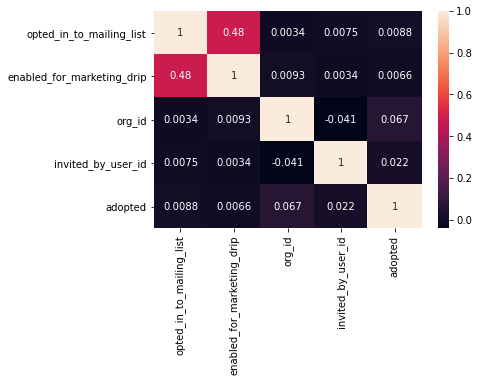

In [31]:
sns.heatmap(df.corr(), annot=True)

### Train test split

In [32]:
y = df['adopted']
X = df.drop('adopted', axis=1)
X = pd.get_dummies(X, drop_first=True)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Modeling

In [34]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
clf = RandomForestClassifier(n_estimators=300, random_state=1, n_jobs=-1)
results = clf.fit(X_train_scaled, y_train)
y_pred = results.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      2054
           1       0.19      0.07      0.10       346

    accuracy                           0.82      2400
   macro avg       0.52      0.51      0.50      2400
weighted avg       0.76      0.82      0.79      2400



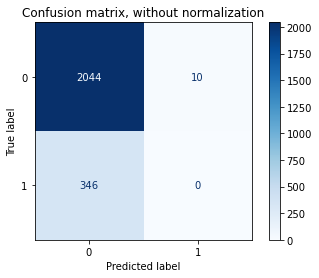

In [36]:
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion matrix, without normalization')
plt.show()

### Plot important features

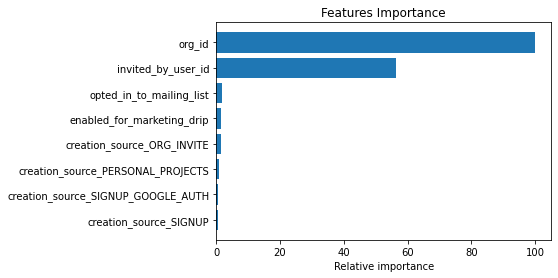

In [37]:
features = clf.feature_importances_
features = 100 * (features / features.max())
sorted_idx = np.argsort(features)

pos = np.arange(sorted_idx.shape[0]) + 0.5
plt.barh(pos, features[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative importance')
plt.title('Features Importance')
plt.show()

## Conclusion

Random forest model generates an accuracy of 79% weighted F-1 score to predict whether the user is adopted or not. However, we have to be aware that the data is imbalanced. The model predicted more than 99% negative (2390/2400), and more than 85% of them are correctly predicted (2044/2390). It is because most customers are not adopted users. It seems that the model does not have a high predictive power.

The two most important features for the model are the organization the users belong to (org_id) and user joining invitation (invited_by_user_id).

Since the data is imbalanced, the model prediction most likely will be lenient towards the majority class.
One of the ways to handle this situation and improve data quality is to either downsample the majority class, or upsample the minority class.
But keep in mind that downsampling may cause info loss, while upsampling may result in overfitting.